## Simulazione dell'esame di Metodi Numerici


# Esercizio 1
Nel file ``testI.mat`` sono memorizzati la matrice A ed il vettore b. 

 - Verificare che per risolvere il sistema Ax=b sia possibile utilizzare i due metodi di discesa visti a lezione. Richiamare il teorema che  garantisce che risolvere un sistema lineare con specifiche proprietà equivale a trovare il minimo di un opportuni funzionale quadratico.  [**Punti 2**]
 - implementare entrambi gli algoritmi e dire quante iterazioni sono necessarie per ciascuno di essi  per calcolare la soluzione con una toll=1e-6 e maxit=4000. Visualizzare in un grafico l'errore in scala logaritmica ad ogni iterazione per ciascuno dei due metodi. [**Punti 5**]
 - Verificare se la matrice è  malcondizionata, dire teoricamente cosa questo implica in termini di velocità di  convergenza alla soluzione di ciascuno dei due metodi, richiamando il risultato teorico visto a lezione. [**Punti 2**]

 - Costruire la matrice A1, ottenuta a partire da A sommandole una matrice diagonale con elementi sulla
      diagonali tutti uguali a 0.05
   nel seguente modo:
   
   A1=A+np.eye(A.shape[0])*0.05
   
   e termine noto b1, costruito in maniera tale che la soluzione del sistema A1 x1 =b1 sia il vettore formato da tutti 1.  Risolvere il sistema lineare con matrice dei coefficienti A1 e termine noto b1, sia con il metodo del gradiente che con il metodo del gradiente coniugato. Osservare il numero di iterazioni eseguito da ciascun metodo e giustificare i risultati  [**Punti 2**]
  
   **Totale: Punti 11**

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testI.mat')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``







In [37]:
from scipy.io import loadmat
import numpy as np
import numpy.linalg as npl

dati = loadmat('testI.mat')
A=dati["A"]
A=A.astype(float)
b=dati["b"]
b=b.astype(float)

In [38]:
"""
Verificare che per risolvere il sistema Ax=b sia possibile utilizzare 
i due metodi di discesa visti a lezione. 
Richiamare il teorema che garantisce che risolvere un sistema lineare con specifiche proprietà 
equivale a trovare il minimo di un opportuni funzionale quadratico.  [**Punti 2**]
"""

# matrice deve essere simmetrica e definita positiva
print(f'Dimensioni matrice: {A.shape}')
print(f'Matrice ben condizionata? {npl.cond(A) < 100}')
if np.all(A == A.T): # .all testa che 
    print(f'La matrice è simmetrica')
    if np.all(npl.eigvals(A)>0):
        print(f'La matrice è definita positiva')
else:
    print(f'La matrice non è adatta ai metodi di discesa')
n,m = A.shape
print(f'La matrice è sparsa? {(np.count_nonzero(A)*100)/(n*m)} %')

Dimensioni matrice: (300, 300)
Matrice ben condizionata? False
La matrice è simmetrica
La matrice è definita positiva
La matrice è sparsa? 9.524444444444445 %


Il teorema è il seguente: data A matrice quadrata, simmetrica e definita positiva, allora la soluzione del sistema lineare Ax = b coincide con il punto di minimo della funzione quadratica F(x) = 1/2 <Ax, x> - <b, x>. In altre parole, risolveere tale sistema equivale a minimizzare la funzione. 
La dimostrazione si basa sui concetti di residuo, gradiente e punto di minimo di una funzione convessa (tramitee matrice Hessiana). 
Il vettore residuo è r = Ax - b- Se x* è soluzione, allora r = Ax* - b = 0.
Si calcola il gradiente per cercare il minimo, infatti lo si pone = 0. Risulta che il vettore che annulla il gradiente coincide con la soluzione del sistema lineare.
Si verifica che tale punto è di minimo per mezzo della matrice Hessiana. Avendo una funzione quadratica, simmetrica e definita positiva, tale matrice coincide con A. Da ciò, F è convessa, quindi ha un solo punto di minimo (quello trovato).

In [39]:
itmax = 4000
tol=1e-6
x0=np.array([[0]*n]).T

In [40]:
"""
implementare entrambi gli algoritmi e dire quante iterazioni sono necessarie per ciascuno di essi 
per calcolare la soluzione con una toll=1e-6 e maxit=4000. 
Visualizzare in un grafico l'errore in scala logaritmica ad ogni iterazione per ciascuno dei due metodi. [**Punti 5**]
"""
def steepestdescent(A,b,x0,itmax,tol):
    # metodo del gradiente per una matrice simmetrica e definita positiva
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
   # inizializzare le variabili necessarie
    x = x0
    r = A@x-b
    p = -r 
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x)
    vet_r=[]
    vet_r.append(errore)
     
# utilizzare il metodo del gradiente per trovare la soluzione
    while errore >= tol and it < itmax:
        it=it+1
        Ap = A@p 
        alpha = -(r.T @ p) / (p.T @ Ap)                
        x = x + alpha * p
        vec_sol.append(x)
        r=r+alpha*Ap
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r        
     
    return x,vet_r,vec_sol,it


def conjugate_gradient(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    x = x0    
    r = A@x-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0)
    vet_r=[]
    vet_r.append(errore)
# utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while errore >= tol and it< itmax:
        it=it+1
        Ap = A@p 
        alpha = -(r.T @ p) / (p.T @ Ap)
        x = x + alpha * p
        vec_sol.append(x)
        rtr_old=r.T@r
        r=r+alpha*Ap
        gamma = (r.T @ r) / rtr_old 
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r + gamma * p
   
    
    return x,vet_r,vec_sol,it

In [41]:
x_steepest, vet_r_steepest, vec_sol_steepest ,it_steepest = steepestdescent(A, b, x0, itmax, tol)
x_congiunto, vet_r_congiunto, vec_sol_congiunto, it_congiunto = conjugate_gradient(A, b, x0, itmax, tol)
print(f'iterazioni steepest descent = {it_steepest}, iterazioni gradiente congiunto = {it_congiunto}')

iterazioni steepest descent = 4000, iterazioni gradiente congiunto = 326


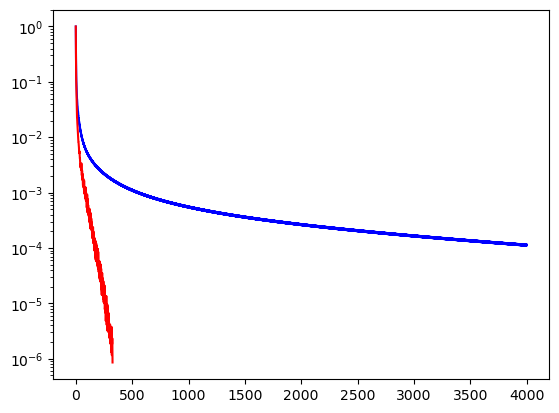

In [42]:
# Visualizzo l'errore in scala logaritmica
import matplotlib.pyplot as plt
plt.semilogy(vet_r_steepest, '-b', vet_r_congiunto, '-r')
plt.show()

In [43]:
"""
Verificare se la matrice è malcondizionata, dire teoricamente cosa questo implica in termini di velocità di convergenza alla soluzione di ciascuno dei due metodi,
richiamando il risultato teorico visto a lezione. [**Punti 2**]
"""

print(f'Matrice mal condizionata? {npl.cond(A) > 100}')

Matrice mal condizionata? True


Essendo i metodi di discesa metodi iterativi, la velocità di convergenza dipende dagli autovalori. Se la matrice è mal condizionata, gli autovalori sono distribuiti in maniera tale da rallentare la convergenza. 

In [44]:
""" 
Costruire la matrice A1, ottenuta a partire da A sommandole una matrice diagonale con 
elementi sulla diagonali tutti uguali a 0.05, nel seguente modo:
   
   A1=A+np.eye(A.shape[0])*0.05
   
e termine noto b1, costruito in maniera tale che la soluzione del sistema A1 x1 = b1 sia il vettore formato da tutti 1.
Risolvere il sistema lineare con matrice dei coefficienti A1 e termine noto b1, sia con il metodo del gradiente che con il metodo del gradiente coniugato. 
Osservare il numero di iterazioni eseguito da ciascun metodo e giustificare i risultati  [**Punti 2**]
"""
A1 = A + np.eye(A.shape[0])*0.05
b1 = np.sum(A1,axis=1) # axis = 1: sommo le righe
x1_st, vet_r_st, vet_sol_st, it_st = steepestdescent(A1, b1, x0, itmax, tol)
x1_con, vet_r_con, vec_sol_con, it_con = conjugate_gradient(A1, b1, x0, itmax, tol)
print(f'iterazioni steepest descent = {it_st}, iterazioni conjugate gradient = {it_con}')
print(f'A1 è una matrice ben condizionata? {npl.cond(A1) < 100}')

iterazioni steepest descent = 166, iterazioni conjugate gradient = 37
A1 è una matrice ben condizionata? True


La matrice A1 è ben condizionata, quindi la velocità di convergenza è maggiore. Di conseguenza, il numero di iterazioni è nettamente inferiore. 

## Esercizio 2 ##

Siano assegnati i numpy array

x =[1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0] 

y =[1.18,1.26,1.23,1.37,1.37,1.45,1.42,1.46,1.53,1.59,1.59] 
                                                               
contenenti rispettivamente le ascisse e le ordinate di 11 punti nel piano.                                                          

Scrivere lo script python in cui:

- si calcola il polinomio di approssimazione ai minimi quadrati di grado 1 dei punti assegnati, sviluppando le functions necessarie. e lo si valuti su 200 punti equidistanti nell'intervallo [1,3]  [**Punti: 4**]

- si calcola il polinomio di interpolazione dei punti assegnati sviluppando le functions necessarie e lo si valuti su 200 punti equidistanti nell'intervallo [1,3]  [**Punti: 4**]

- Si modifichino le ordinate dei punti assegnati, facendo uso della formula   $\hat{y_i}=2*x_i+1$, $i=1,...,11$, e si ricalcoli il polinomio interpolante ed il polinomio di approssimazione di grado 1, a partire dalle coppie $(x_i,\hat{y_i})$, $i=1,11$   [**Punti: 1**]

- Si visualizzi in un grafico il polinomio interpolante, il polinomio di approssimazione di grado 1 ed i punti$(x_i,y_i)$, i=1,11 ed in un altro grafico il polinomio interpolante, il polinomio di approssimazione di grado 1 ed i $(x_i,\hat{y_i})$, $i=1,11$  [**Punti:1**]

- Si fornisca una spiegazione teorica dei risultati ottenuti
  [**Punti: 4**]

                                                                        Totale 14 punti

## Domanda intelligenza artificiale

- Importanza del learning rate nell'allenamento di una rete neurale 
[**Punti: 1**]
- Illustra l'algoritmo di backpropagation per il calcolo delle derivate parziale della funzione costo rispetto ai pesi di tutti i layer, nel caso di una MLP con 1 nodo di input, 3 layer nascosti formati da un solo nodo, ed 1 nodo di output. [**Punti: 4**] 
 
- Tecniche di Ottimizzazione: metodo di discesa del gradient batch, metodo del gradiente stocastico (SGD) ,metodo del gradiente stocastico minibatch. [**Punti: 2**]


    [**Totale: punti 7**]
